In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
new_df = df.sample(30000,random_state=2)

In [4]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [6]:
new_df.duplicated().sum()

0

Text(0.5, 0, 'Question Class')

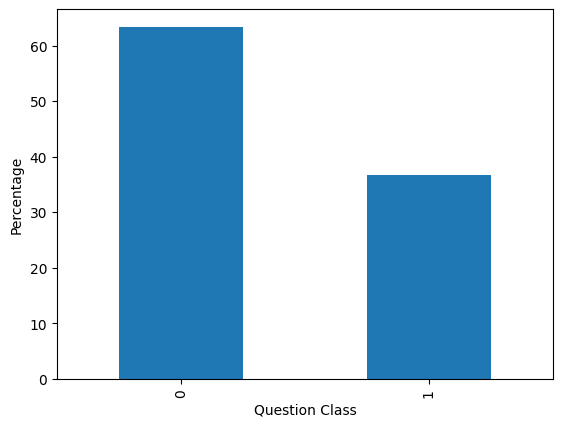

In [7]:
(new_df['is_duplicate'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.xlabel('Question Class')

In [ ]:
### Checking Repeated Questions in whole dataset that is qid1 and qid2
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of Unique Questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of Questions getting repeated',x[x].shape[0])

Number of Unique Questions 55299
Number of Questions gettinf repeated 3480


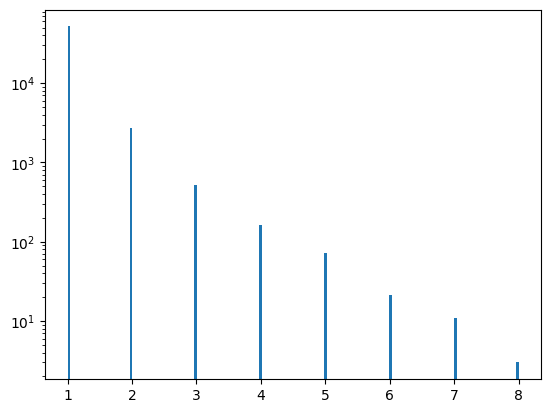

In [9]:
### Histograms
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

### Generating some new features for the Problem(Feature Engineering).
1. Length of Q1
2. Length of Q2
3. Number of words in Q1
4. Number of words in Q2
5. Common words in Q1 and Q2
6. Total words in Q1 and Q2 combined
7. Words shared between Q1 and Q2 i.e Common Words/Total Words

In [ ]:
### Length of Q1 and Q2
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [ ]:
## Number of words in Q1 and Q2
new_df['q1_num_words']=new_df['question1'].apply(lambda x:len(x.split()))
new_df['q2_num_words']=new_df['question2'].apply(lambda x:len(x.split()))
##.split(), Splits on any whitespace (spaces, tabs, newlines) Ignores extra spaces — treats 
## consecutive spaces as one separator. Doesn’t return empty strings.

In [36]:
## Common words for Q1 and Q2

new_df['word_common'] = new_df.apply(
    lambda row: len(
        set(word.lower().strip() for word in row['question1'].split()) &
        set(word.lower().strip() for word in row['question2'].split())
    ),
    axis=1
)

In [38]:
new_df.drop('common_word_count',axis=1,inplace=True)

In [39]:
new_df['word_total'] = new_df.apply(
    lambda row: len(
        set(word.lower().strip() for word in row['question1'].split()) |
        set(word.lower().strip() for word in row['question2'].split())
    ),
    axis=1
)

In [40]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10


In [41]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13,0.85
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16,0.44
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10,0.30


minimum characters 2
maximum characters 391
average num of characters 59


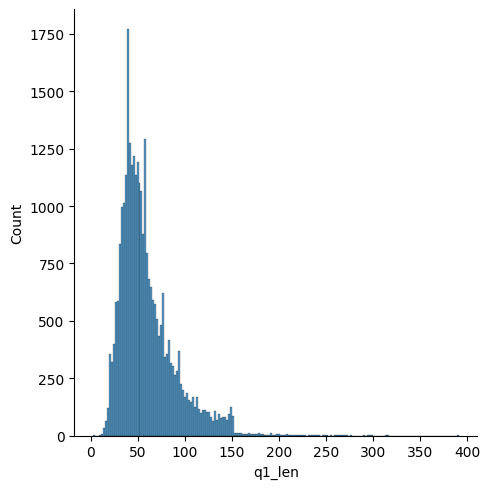

In [42]:
### EDA of new features.
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


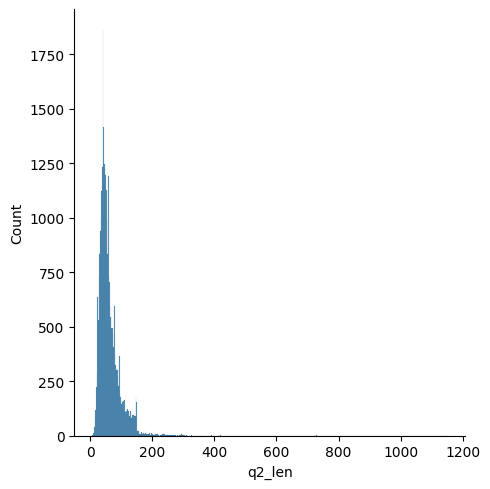

In [43]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 72
average num of characters 10


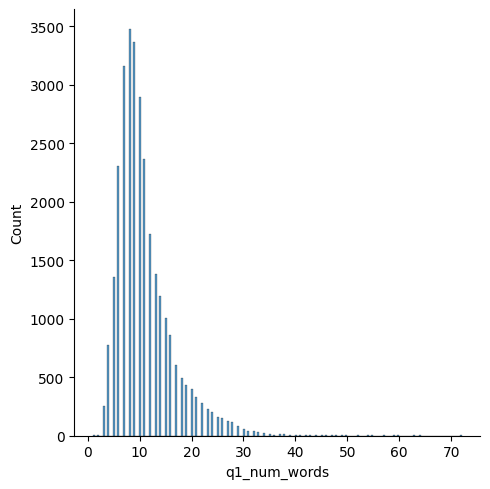

In [44]:
sns.displot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 237
average num of characters 11


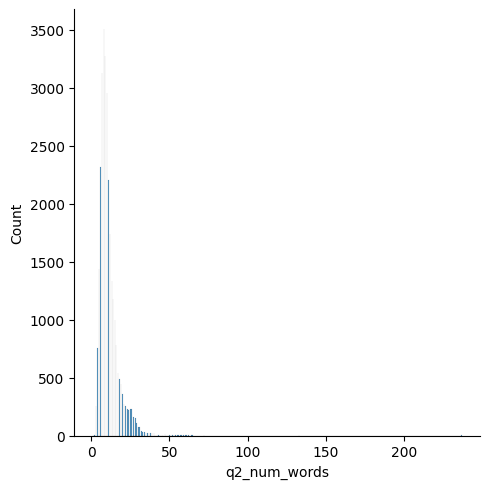

In [45]:
sns.displot(new_df['q2_num_words'])
print('minimum characters',new_df['q2_num_words'].min())
print('maximum characters',new_df['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

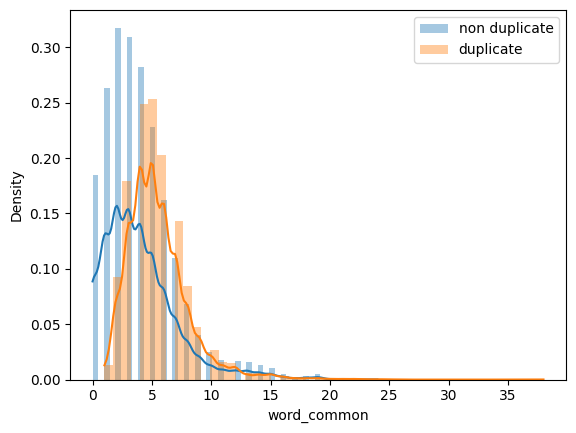

In [ ]:
## Common Words
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
plt.legend()
plt.show()
### Shows probability of being duplicate is higher when common words>4 or 5.

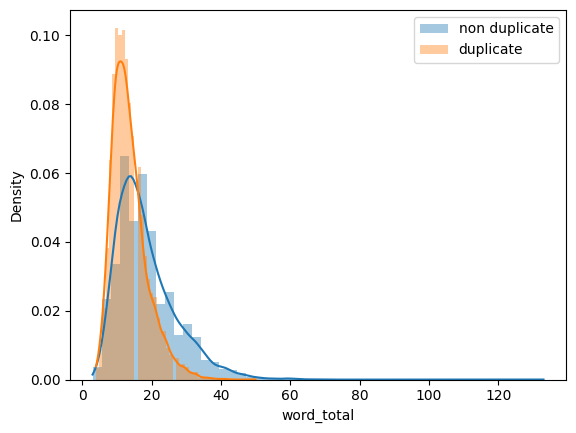

In [ ]:
# total words
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
plt.legend()
plt.show()
## Similarly here probability of being duplicate is higher when word_total is less than<15 

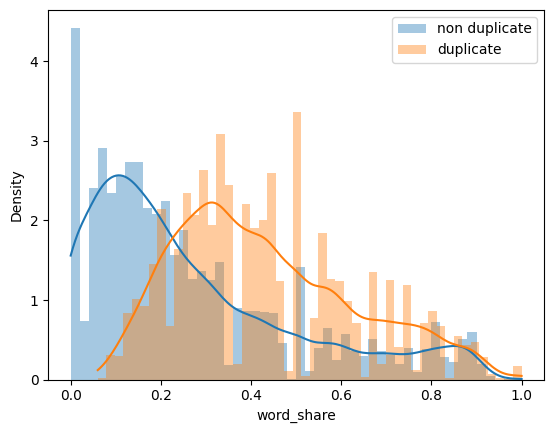

In [ ]:
# word share
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate',kde=True,stat='density',bins=50,element='step',alpha=0.4,edgecolor=None)
plt.legend()
plt.show()
## Here as well proability of being duplicate is higher when word_share>0.25

### Applying BOW and ML Model

In [75]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [76]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,13,0.85
115086,0,49,57,12,15,7,16,0.44
327711,0,105,120,25,17,2,32,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,10,0.30


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)
questions = list(ques_df['question1']) + list(ques_df['question2'])
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [78]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [79]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,13,0.85,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7755

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7625